# Etude de cas
# Machine Learning


In [1]:
# Imports
import json
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from pprint import pprint


# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Data engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

### Check data

In [2]:
# Data Load
df = pd.read_csv("data_client_churn.csv")

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Drop index, customerId
df = df.drop(["customerID", "Unnamed: 0"], axis=1)
# Drop categorical columns to fix
# df = df.drop(["OnlineBackup", "TechSupport", "StreamingTV", "StreamingMovies"], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      1409 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       5517 non-null   object 
 12  StreamingTV       5517 non-null   object 
 13  StreamingMovies   5517 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Fix Total Charges column

In [6]:
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True)
df['TotalCharges'] = df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'])
df['TotalCharges'] = df['TotalCharges'].astype("float64")

# To check value count
# df['TotalCharges'].value_counts(sort=True, dropna=False)


### Fix Techsupport column

In [7]:
df_tech_nan = df[df['TechSupport'].isna()]
df_tech_nan

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,NaN,NaN,NaN,Two year,No,Credit card (automatic),18.95,303.20,No
16,Female,0,No,No,52,Yes,No,No,No internet service,NaN,No internet service,NaN,NaN,NaN,One year,No,Mailed check,20.65,1022.95,No
21,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,No internet service,NaN,NaN,NaN,One year,No,Bank transfer (automatic),19.80,202.25,No
22,Male,0,No,No,1,Yes,No,No,No internet service,NaN,No internet service,NaN,NaN,NaN,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,Male,0,No,No,1,Yes,No,No,No internet service,NaN,No internet service,NaN,NaN,NaN,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,Female,0,No,No,51,Yes,No,No,No internet service,NaN,No internet service,NaN,NaN,NaN,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,Female,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,NaN,NaN,NaN,Two year,No,Mailed check,20.15,826.00,No
7020,Male,0,Yes,Yes,12,Yes,No,No,No internet service,NaN,No internet service,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,19.20,239.00,No
7030,Female,0,No,No,2,Yes,No,No,No internet service,NaN,No internet service,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,20.05,39.25,No


In [8]:
cat_cols = df.select_dtypes(include="object").columns.to_list()
print("Category columns: ", cat_cols)

Category columns:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [9]:
def matrix_bar(df):
    cross_results = []
    category_cols = cat_cols[:]
    number_axis_graphs = len(category_cols)
    print(f"Matrix size: {number_axis_graphs}x{number_axis_graphs}")
    f, ax = plt.subplots(number_axis_graphs,number_axis_graphs, figsize=(50, 50))
    
    for index_x, column_left in enumerate(category_cols):
        for index_y, column_right in enumerate(category_cols):
            cross_result = pd.crosstab(index=df[column_left],columns=df[column_right]).to_numpy()
            ax[index_x][index_y].imshow(cross_result, interpolation="nearest")
            ax[index_x][index_y].set_title(f"{column_left} vs {column_right}")

# matrix_bar(df)

In [10]:
def matrix_bar(df):
    cross_results = []
    category_cols = cat_cols[:]
    for index_x, column_left in enumerate(category_cols):
        line = []
        for index_y, column_right in enumerate(category_cols):
            line.append(pd.crosstab(index=df[column_left],columns=df[column_right]))
            # cross_results[index_x][index_y] = pd.crosstab(index=df[column_left],columns=df[column_right])
        cross_results.append(line)
    number_axis_graphs = len(cross_results)
    print(f"Matrix size: {number_axis_graphs}x{number_axis_graphs}")
    # number_axis_graphs = 3
    # f, ax = plt.subplots(number_axis_graphs,number_axis_graphs, figsize=(10, 100))
    for index_x, line_cross_result in enumerate(cross_results[:]):
        f, ax = plt.subplots(1,number_axis_graphs, figsize=(100, 100/number_axis_graphs))
        for index_y, cross_result in enumerate(line_cross_result[:]):
            # if(index_x >= index_y):
                # cross_result.plot.bar(rot=0, ax=ax[index_x][index_y])
                # print(cross_result)
            sns.heatmap(cross_result, annot=True,fmt=".3f",square = True, cmap=sns.cm.rocket_r, ax=ax[index_y])
        # plt.show()
                # sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')

# matrix_bar(df)

In [34]:
def matrix_bar(df):
    cross_results = []
    category_cols = cat_cols[:]
    for index_x, column_left in enumerate(category_cols):
        line = []
        for index_y, column_right in enumerate(category_cols):
            line.append(pd.crosstab(index=df[column_left],columns=df[column_right]))
            # cross_results[index_x][index_y] = pd.crosstab(index=df[column_left],columns=df[column_right])
        cross_results.append(line)
    # print(cross_results)
    number_axis_graphs = len(cross_results)
    print(f"Matrix size: {number_axis_graphs}x{number_axis_graphs}")
    # number_axis_graphs = 3
    f, ax = plt.subplots(number_axis_graphs,number_axis_graphs, figsize=(90, 90))
    for index_x, line_cross_result in tqdm(enumerate(cross_results[:])):
        for index_y, cross_result in enumerate(line_cross_result[:]):
            if(index_x >= index_y):
                # cross_result.plot.bar(rot=0, ax=ax[index_x][index_y])
                # print(cross_result)
                heatmap_plot = sns.heatmap(cross_result, annot=True, vmin=0, fmt=".3f",square = True, cmap=sns.cm.rocket_r, ax=ax[index_x][index_y])
                fig = heatmap_plot.get_figure()
                # sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    return fig

fig = matrix_bar(df)

Matrix size: 16x16


16it [05:21, 20.06s/it]


In [12]:
fig.savefig("out.png") 
print(type(fig))

<class 'matplotlib.figure.Figure'>


---

In [13]:
cat_cols = df.select_dtypes(include="object").columns.to_list()
print("Category columns: ", cat_cols)

Category columns:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [14]:
df[cat_cols].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         2
StreamingTV         2
StreamingMovies     2
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [15]:
df[cat_cols].count()

gender              7043
Partner             7043
Dependents          7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        1409
DeviceProtection    7043
TechSupport         5517
StreamingTV         5517
StreamingMovies     5517
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
Churn               7043
dtype: int64

In [16]:
non_cat_cols = df.select_dtypes(exclude="object").columns.to_list()
print("Non object columns: ", non_cat_cols)

Non object columns:  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


### Create mapping for encoding

In [17]:
def get_encoder_mapping(dataframe, categorical_columns):
    encoder_mapping = {}
    
    for cat_col in categorical_columns:
        enc = LabelEncoder()
        temp_keys = dataframe[cat_col].values
        temp_values = enc.fit_transform(dataframe[cat_col]).tolist()
        encoder_mapping_col = dict(zip(temp_keys, temp_values))
        encoder_mapping[cat_col] = encoder_mapping_col
    return encoder_mapping

In [18]:
encoding_map = get_encoder_mapping(df, cat_cols)
pprint(encoding_map)
with open("encoding.json", "w") as outfile:
    json.dump(encoding_map, outfile)

{'Churn': {'No': 0, 'Yes': 1},
 'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2},
 'Dependents': {'No': 0, 'Yes': 1},
 'DeviceProtection': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'InternetService': {'DSL': 0, 'Fiber optic': 1, 'No': 2},
 'MultipleLines': {'No': 0, 'No phone service': 1, 'Yes': 2},
 'OnlineBackup': {nan: 3, 'No': 0, 'No internet service': 1, 'Yes': 2},
 'OnlineSecurity': {'No': 0, 'No internet service': 1, 'Yes': 2},
 'PaperlessBilling': {'No': 0, 'Yes': 1},
 'Partner': {'No': 0, 'Yes': 1},
 'PaymentMethod': {'Bank transfer (automatic)': 0,
                   'Credit card (automatic)': 1,
                   'Electronic check': 2,
                   'Mailed check': 3},
 'PhoneService': {'No': 0, 'Yes': 1},
 'StreamingMovies': {nan: 2, 'No': 0, 'Yes': 1},
 'StreamingTV': {nan: 2, 'No': 0, 'Yes': 1},
 'TechSupport': {nan: 2, 'No': 0, 'Yes': 1},
 'gender': {'Female': 0, 'Male': 1}}


In [19]:
def encode(dataframe, encoding_map):
    for column, mapping in encoding_map.items():
        dataframe[column].replace(mapping, inplace=True)

In [20]:
df_enc = df.copy()
encode(df_enc, encoding_map)
df_enc


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,3,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,3,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,3,2,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,3,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,1,1,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,3,2,0,1,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,3,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,3,0,0,0,0,0,1,3,74.40,297.60,1


## Train models

### Split train test 

In [21]:
X = df_enc.iloc[:,:-1]
y = df_enc.iloc[:,-1]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, shuffle=True)


## Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

The confusion matrix is :[[467  44]
 [ 85 109]]
The precision is: 0.7124183006535948
The recall is: 0.5618556701030928


/home/frank/anaconda3/envs/BCG/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


<AxesSubplot:>

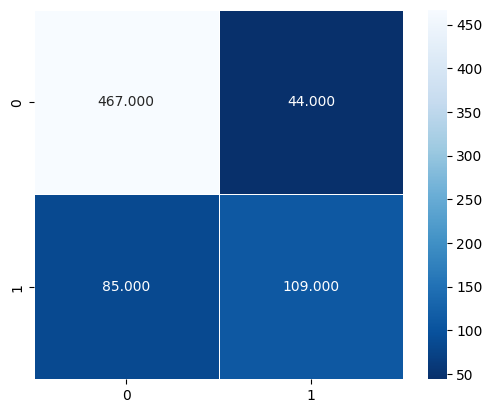

In [24]:
LR = LogisticRegression().fit(X_train, y_train)
y_pred = LR.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"The confusion matrix is :{cm}")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"The precision is: {precision}")
print(f"The recall is: {recall}")
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')


## Random Forest

The confusion matrix is :[[466  45]
 [ 97  97]]
The precision is: 0.6830985915492958
The recall is: 0.5


<AxesSubplot:>

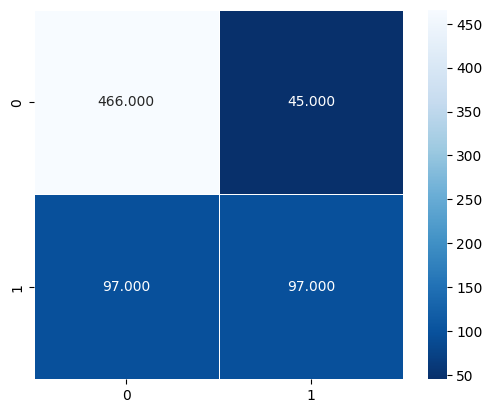

In [25]:
RF = RandomForestClassifier().fit(X_train, y_train)
y_pred = RF.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"The confusion matrix is :{cm}")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"The precision is: {precision}")
print(f"The recall is: {recall}")
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')


## MLP 

The confusion matrix is :[[484  27]
 [117  77]]
The precision is: 0.7403846153846154
The recall is: 0.39690721649484534


<AxesSubplot:>

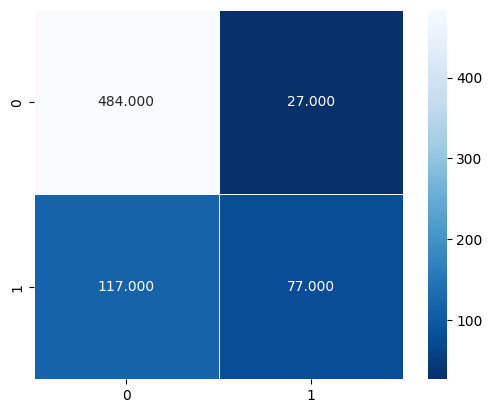

In [26]:
# MLPRegressor
MLP = MLPClassifier().fit(X_train, y_train)
y_pred = MLP.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(f"The confusion matrix is :{cm}")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"The precision is: {precision}")
print(f"The recall is: {recall}")
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
